

# MAT306 - Laboratorio N°09

**Objetivo**: Aplicar un flujo completo de **Machine Learning supervisado** para la clasificación de tumores mamarios, utilizando técnicas de preprocesamiento, reducción de dimensionalidad y modelos de clasificación con optimización de hiperparámetros.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.





<img src="https://www.svgrepo.com/show/1064/virus.svg" width = "300" align="center"/>



El **cáncer de mama** es una enfermedad caracterizada por la proliferación maligna de células epiteliales en los conductos o lobulillos mamarios. Surge cuando una célula acumula mutaciones que le otorgan la capacidad de dividirse de manera descontrolada, lo que da origen a un tumor. Este tumor puede permanecer localizado o, en casos más agresivos, invadir tejidos cercanos y propagarse a otras partes del organismo mediante metástasis.

El conjunto de datos **`BC.csv`** recopila información clínica y morfológica de pacientes con tumores mamarios, clasificados como **benignos** o **malignos**. Las características se obtienen a partir de imágenes digitalizadas de aspirados con aguja fina (FNA, por sus siglas en inglés) de masas mamarias. Dichas variables describen aspectos cuantitativos de los **núcleos celulares**, como su tamaño, forma, textura y homogeneidad.

Este tipo de información es fundamental para la detección temprana y clasificación de tumores, ya que permite entrenar modelos de **machine learning** capaces de apoyar el diagnóstico y diferenciar entre tumores benignos y malignos con mayor precisión.

A continuación, se procederá a cargar y explorar el conjunto de datos:



In [1]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar herramientas de Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Configuración de gráficos
%matplotlib inline
sns.set_palette("deep", desat=0.6)
sns.set(rc={'figure.figsize': (11.7, 8.27)})

# Cargar y preparar los datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT306/main/docs/labs/data/BC.csv")
df.set_index('id', inplace=True)

# Transformación de la variable objetivo
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0}).astype(int)

# Visualizar las primeras filas del DataFrame
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Con base en la información presentada, resuelva las siguientes tareas. Asegúrese de:

* Incluir el **código necesario** para ejecutar cada análisis.
* Explicar de manera **clara y fundamentada** los resultados obtenidos.
* Describir el **proceso seguido**, justificando las decisiones tomadas en cada etapa (preprocesamiento, elección de técnicas y parámetros, interpretación de resultados).





1. **Análisis exploratorio profundo (EDA):**

   * Examine la distribución de las variables, identifique valores atípicos y analice la correlación entre características.
   * Visualice las diferencias más relevantes entre tumores **benignos** y **malignos** utilizando gráficos adecuados (boxplots, histogramas, mapas de calor).
   * Discuta qué variables parecen tener mayor capacidad discriminativa.


In [2]:
print(df.columns.tolist())
len(df.columns.tolist())

['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


31

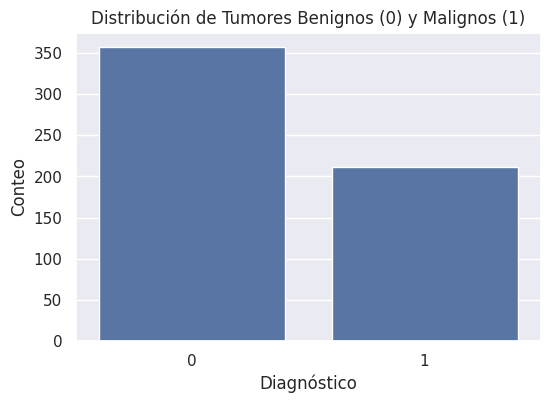

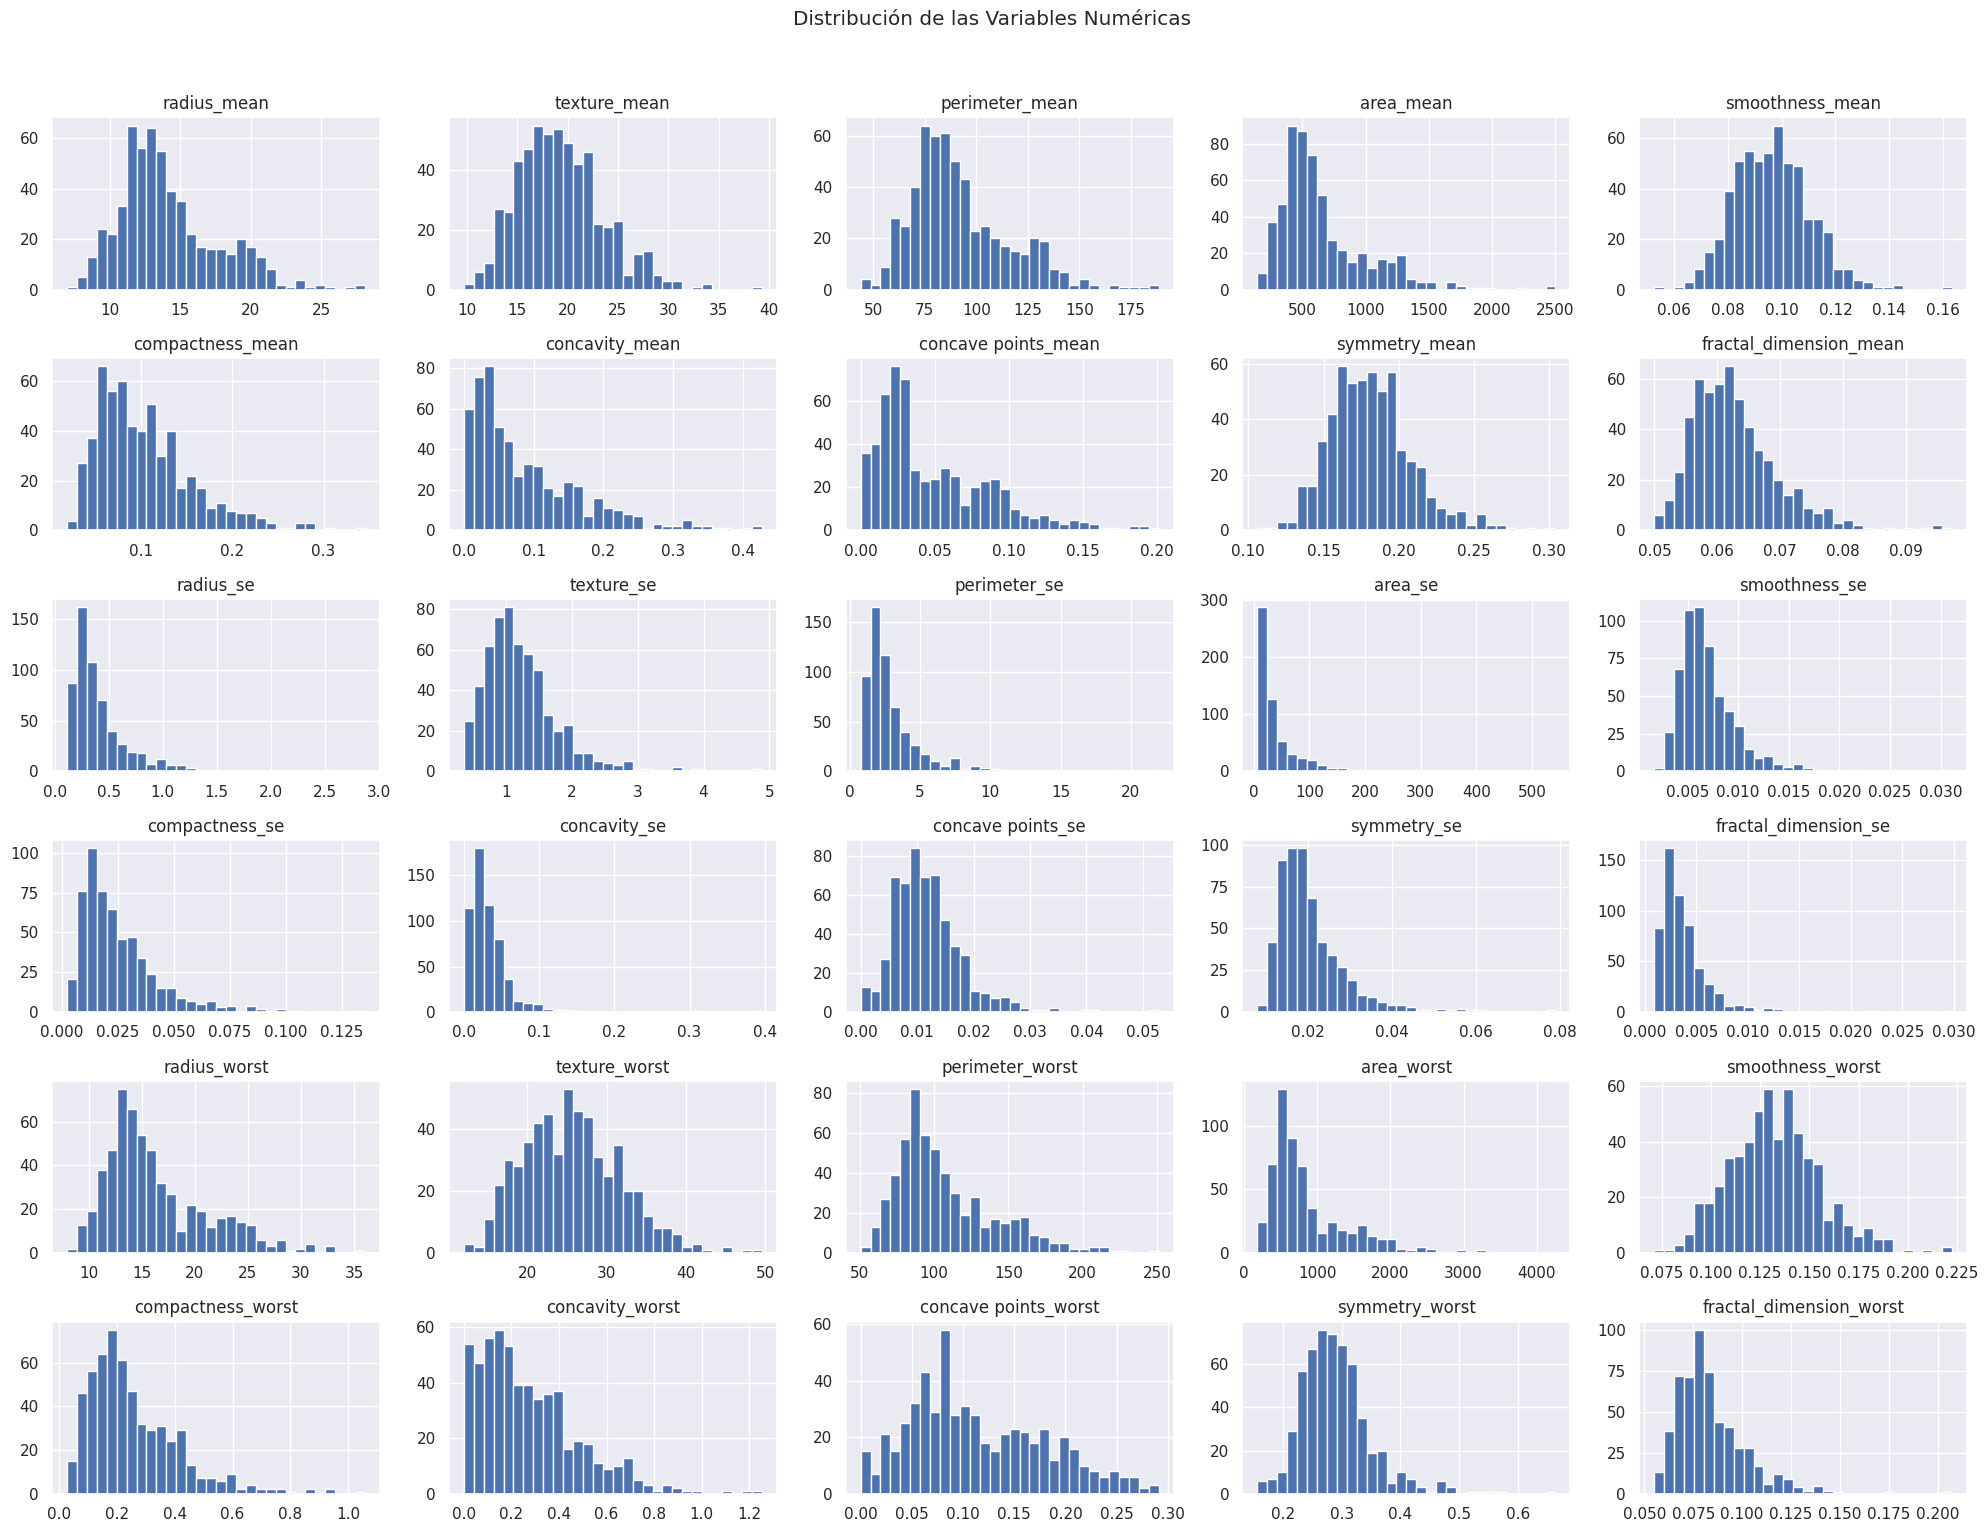

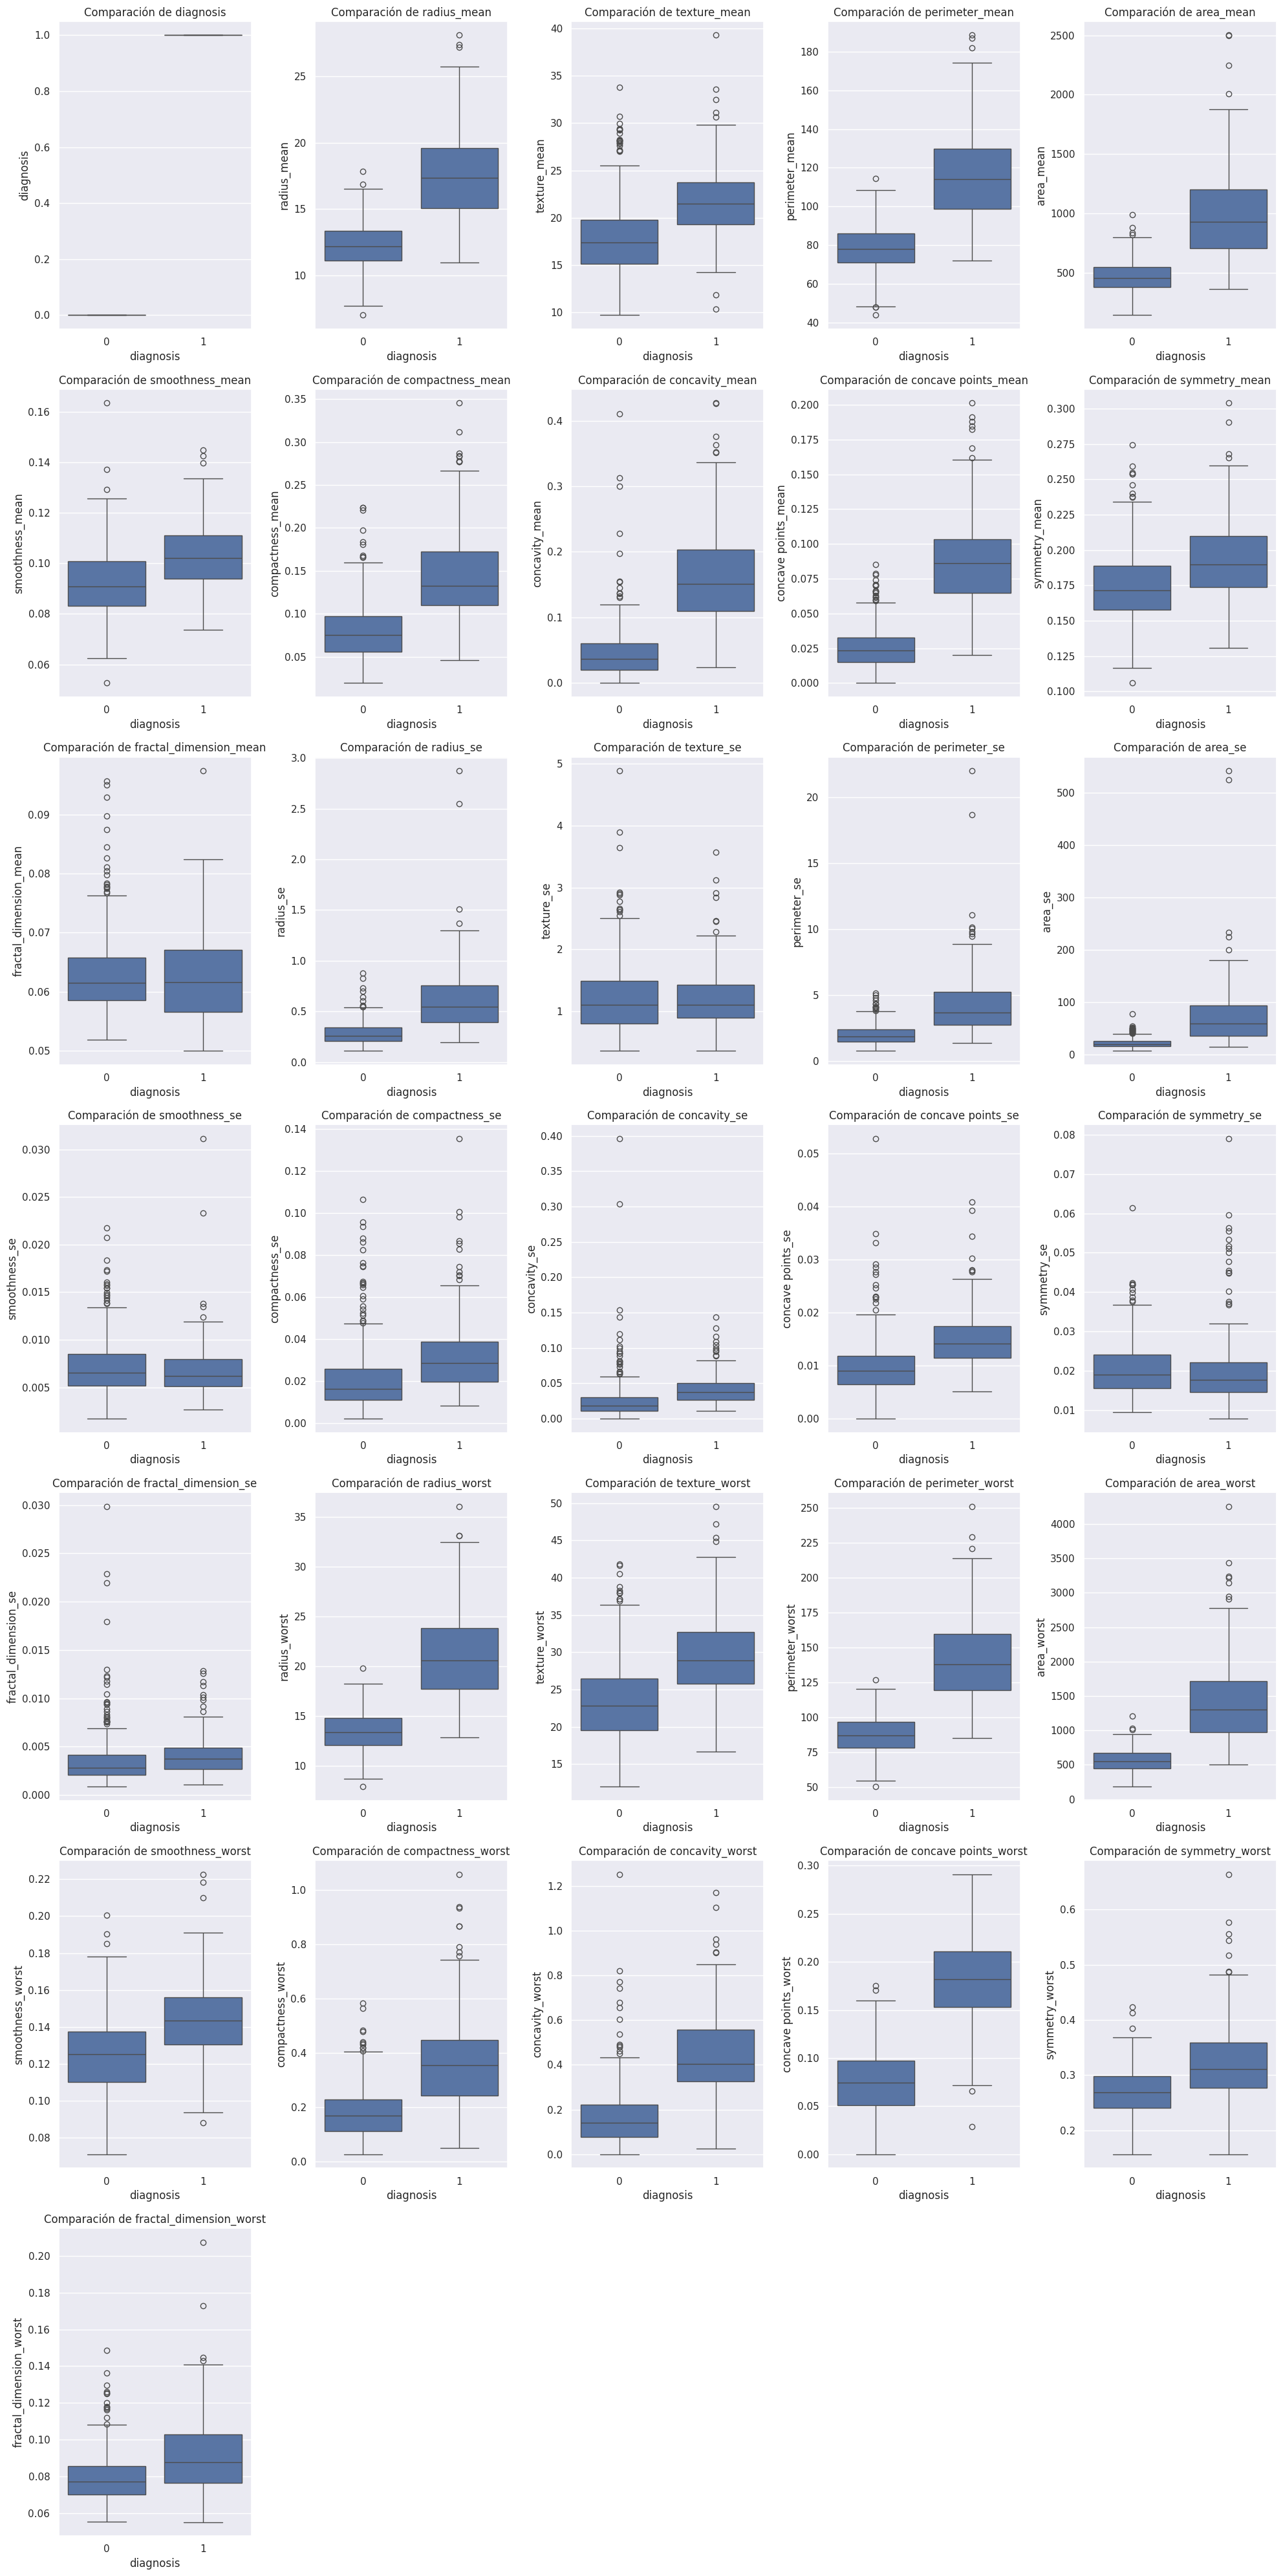

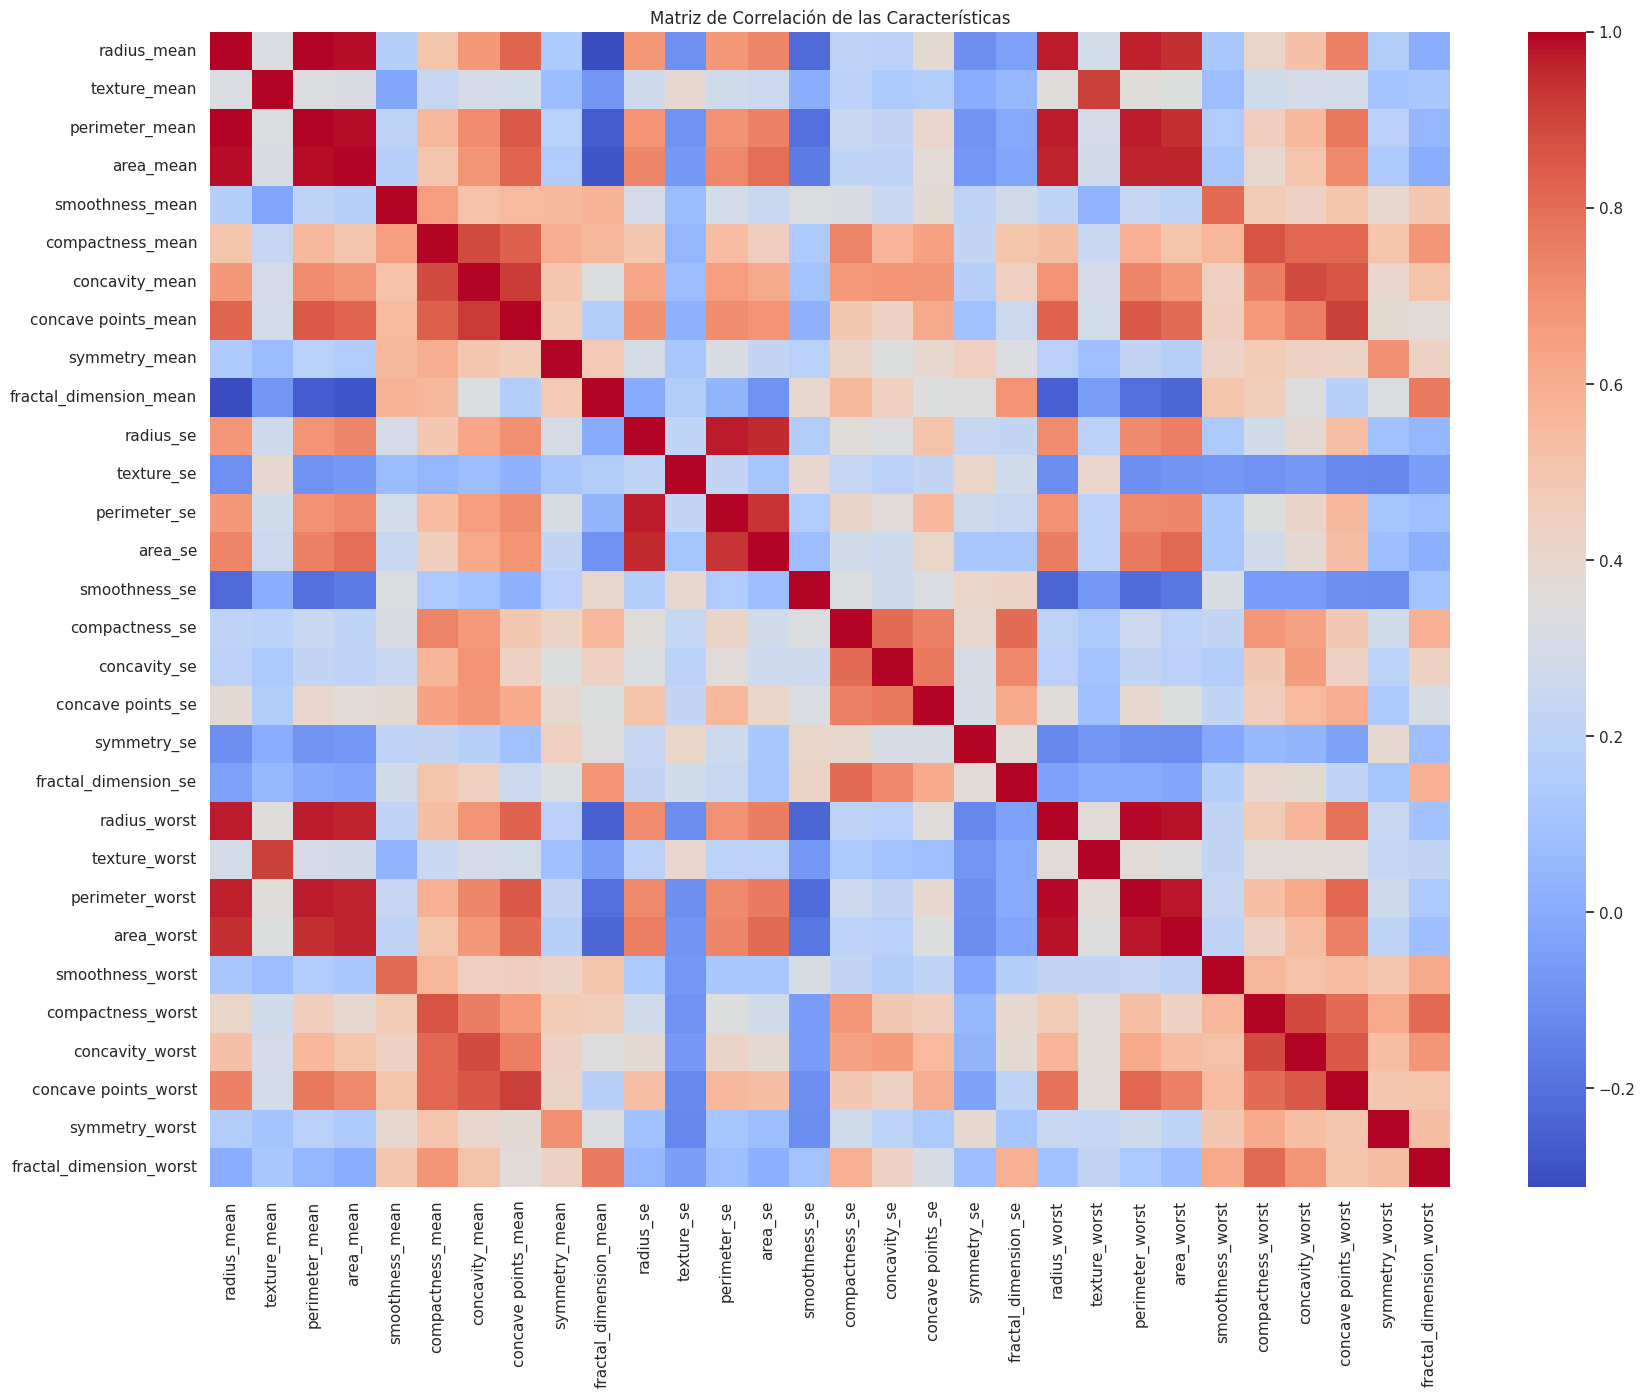

In [3]:
# 1. Análisis exploratorio profundo (EDA)

# Distribución de la variable objetivo
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=df)
plt.title('Distribución de Tumores Benignos (0) y Malignos (1)')
plt.xlabel('Diagnóstico')
plt.ylabel('Conteo')
plt.show()

# Distribución de algunas variables numéricas
df.drop('diagnosis', axis=1).hist(bins=30, figsize=(20, 15))
plt.suptitle('Distribución de las Variables Numéricas', y=1.02, ha='center')
plt.tight_layout()
plt.show()

# Boxplots para comparar variables entre diagnósticos

#features_to_compare = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']
features_to_compare = df.columns.tolist()

plt.figure(figsize=(20, 40))
rows = 7
cols = 5
# 7*5=35>31
for i, feature in enumerate(features_to_compare):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(x='diagnosis', y=feature, data=df)
    plt.title(f'Comparación de {feature}')

plt.tight_layout()
plt.show()


# Matriz de correlación
plt.figure(figsize=(20, 15))
correlation_matrix = df.drop('diagnosis', axis=1).corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Matriz de Correlación de las Características')
plt.show()

Notemos que la cantidad de diagnósticos benignos y malignos tienen orden de magnitud similar.

Vemos que la mayoría de variables muestran una multitud de datos atípicos en los box-plots. Un modelo de machine learning (en vez de uno de regresión lineal) probablemente es una muy buena idea.

Las variables con mayor capacidad discriminativa en el dataset probablemente sean aquellas en que los boxplots de un diagnóstico y otro son los más disjuntos posible, por desgracias casi todos los rangos son muy altos, pero al menos podemos fijarnos en aquellas variables en que los 2 cuartiles del centro sean disjuntos, como por ejemplo
radius_mean, perimeter_mean, area_mean,concavity_mean, compactness_mean, compactness_worst, radius_worst, etc

De hecho, podría ser que muchas de estas variables sean redundantes, por ejemplo dado una concavidad, radio y area, el perimetro sea algo redundante para el modelo.

También es probable que sea redundante considerar tantas parámetros distintos sobre las mismas mediciones (tanto el promedio como la desviación estándar del radio por ejemplo)


2. **Preprocesamiento de datos:**

   * Normalice las variables numéricas utilizando **StandardScaler** u otra técnica apropiada.
   * Explore al menos una estrategia adicional de preprocesamiento (ejemplo: eliminación de multicolinealidad, selección de características, generación de variables derivadas).
   * Justifique sus elecciones.


In [4]:
# 2. Preprocesamiento de datos

# Separar características (X) y variable objetivo (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir de nuevo a DataFrame para mantener los nombres de las columnas
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

# Mostrar las primeras filas del DataFrame escalado
display(X_scaled_df.head())

# Estrategia adicional de preprocesamiento: Eliminación de multicolinealidad
# Calculamos el Factor de Inflación de Varianza (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X_scaled_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled_df.values, i)
                   for i in range(len(X_scaled_df.columns))]

display(vif_data.sort_values(by='VIF', ascending=False))

# Discutir las implicaciones de la multicolinealidad y si se decide eliminar alguna variable

# Nota: Para este laboratorio, no eliminaremos variables basándonos solo en el VIF para mantener todas las características originales
# para la reducción de dimensionalidad, pero en un escenario real, se podría considerar eliminar variables con VIF alto.

print("\nPreprocesamiento completado: Datos normalizados y análisis de multicolinealidad realizado.")

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
842517,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
84300903,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
84348301,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
84358402,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


,feature,VIF
0,radius_mean,3806.115296
2,perimeter_mean,3786.400419
20,radius_worst,799.105946
22,perimeter_worst,405.023336
3,area_mean,347.878657
23,area_worst,337.221924
10,radius_se,75.462027
6,concavity_mean,70.767720
12,perimeter_se,70.359695
7,concave points_mean,60.041733



Preprocesamiento completado: Datos normalizados y análisis de multicolinealidad realizado.


0	radius_mean	3806.115296
2	perimeter_mean	3786.400419

Los altos VIF obtenidos para radius_mean y perimeter_mean indican que parecen ser una combinación lineal de las demás features y que puede ser conveniente (especialmente en un modelo de regresión lineal) eliminarlas (siendo estrictos, habría que eliminar solo el radius_mean y ver qué pasa con el VIF de perimeter_mean al hacerlo, en cualquier caso aquí no eliminaremos ninguna variable).

Haber medido el VIF está justificado en nuestros insights anteriores, el radio puede aproximarse matemáticamente si se conoce el área y la concavidad, lo mismo para el perímetro.


3. **Reducción de dimensionalidad:**

   * Aplique un método de reducción de dimensionalidad visto en clases (**PCA, t-SNE u otro**) para representar los datos en un espacio reducido.
   * Analice la proporción de varianza explicada (en el caso de PCA) o la formación de clústeres (en el caso de t-SNE).
   * Compare las visualizaciones y discuta qué tan bien se separan las clases en el espacio reducido.


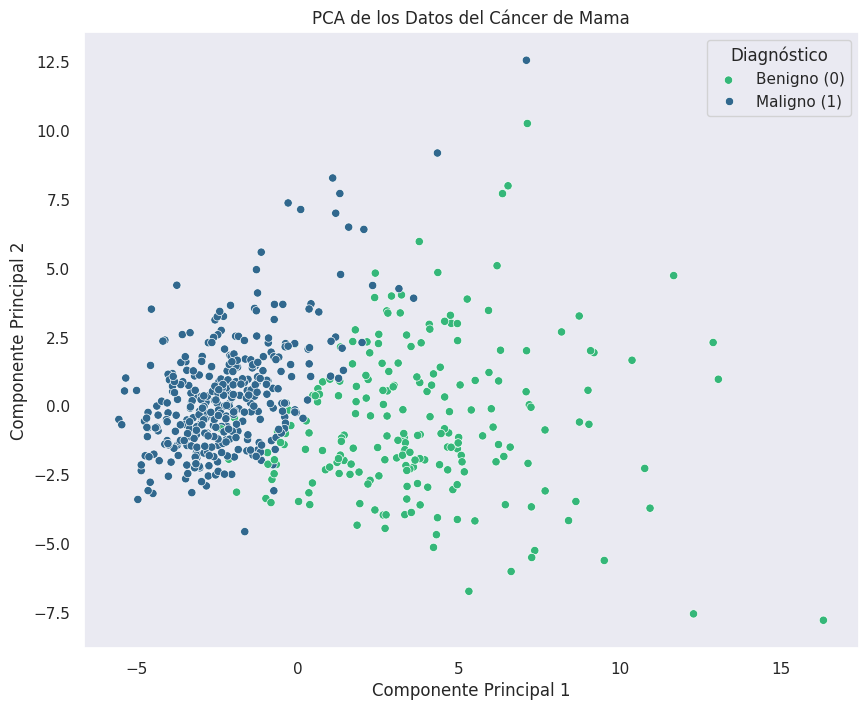

Varianza explicada por el Componente Principal 1: 0.4427
Varianza explicada por el Componente Principal 2: 0.1897
Varianza total explicada por los 2 componentes principales: 0.6324

Reducción de dimensionalidad con PCA completada.


,PC1,PC2
concave points_mean,0.260854,0.034768
concavity_mean,0.258400,0.060165
concave points_worst,0.250886,0.008257
compactness_mean,0.239285,0.151892
perimeter_worst,0.236640,0.199878


,PC1,PC2
fractal_dimension_mean,0.064363,0.366575
fractal_dimension_se,0.102568,0.280092
fractal_dimension_worst,0.131784,0.275339
radius_mean,0.218902,0.233857
compactness_se,0.170393,0.232716


In [5]:
# 3. Reducción de dimensionalidad con PCA

# Aplicar PCA
pca = PCA(n_components=2)  # Reducir a 2 componentes para visualización 2D
X_pca = pca.fit_transform(X_scaled)

# Crear un DataFrame con los componentes principales y el diagnóstico
pca_df = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2'])
pca_df['diagnosis'] = y.values

# Visualizar los resultados de PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x='principal component 1', y='principal component 2', hue='diagnosis', data=pca_df, palette='viridis')
plt.title('PCA de los Datos del Cáncer de Mama')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Diagnóstico', loc='upper right', labels=['Benigno (0)', 'Maligno (1)'])
plt.grid()
plt.show()

# Analizar la varianza explicada
print(f"Varianza explicada por el Componente Principal 1: {pca.explained_variance_ratio_[0]:.4f}")
print(f"Varianza explicada por el Componente Principal 2: {pca.explained_variance_ratio_[1]:.4f}")
print(f"Varianza total explicada por los 2 componentes principales: {pca.explained_variance_ratio_.sum():.4f}")

print("\nReducción de dimensionalidad con PCA completada.")

loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=X.columns
)

display(loadings.abs().sort_values(by='PC1', ascending=False).head())   # variables más influyentes en PC1
display(loadings.abs().sort_values(by='PC2', ascending=False).head())   # variables más influyentes en PC2


De la imagen vemos que los clusters se separan muy bien, parece haber solo un pequeño solapamiento al centro, y algunos casos de cáncer beningno que, en este espacio reducido, quedan muy pegadas al cluster de cáncer maligno.

Esto podría deberse a que una reducción a un espacio de dimension 2 no es suficiente (después de todo, solo están explicando 63% de la varianza) o que las features son simplemente insuficientes para predecir correctamente el diagnóstico (también puede ser que los datos en este solapamiento correspondan a datos atípicos, convendría analizar esta última situación identificando claramente los datos atípicos primero).

Notar que las variables que mayormente determinan PC_1 son las de concavidad y las de PC_2 son las de dimensión fractal, que no tiene por qué ser las variables con la mayor capacidad de discriminación.

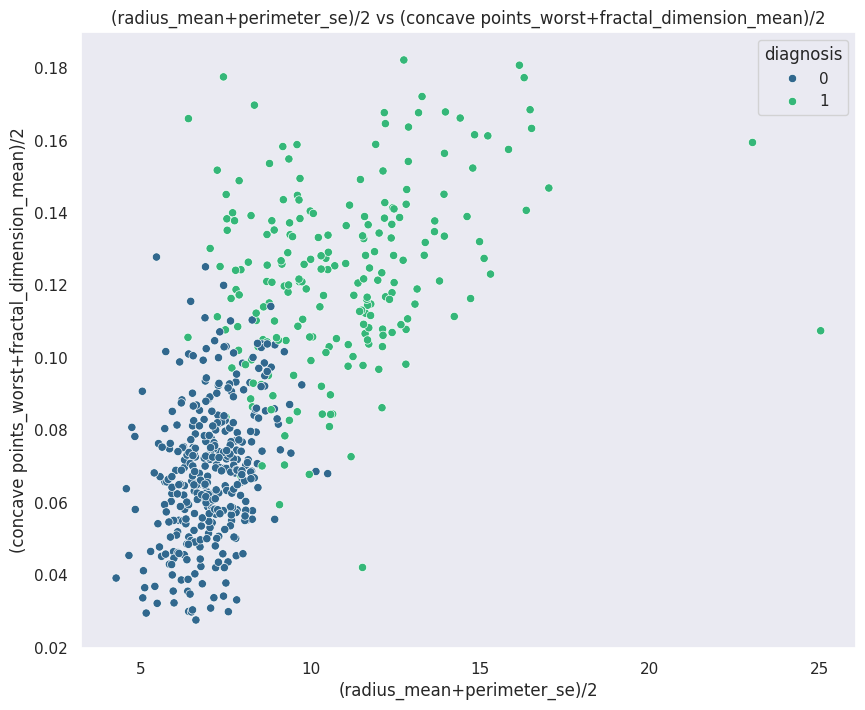

In [6]:
# Construir DataFrame con las dos variables de interés
df_two = pd.DataFrame({
    'X': (X['radius_mean']+X['perimeter_se'])/2,
    'Y': (X['concave points_worst']+X['fractal_dimension_mean'])/2,
    'diagnosis': y
})

# Graficar
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='X',
    y='Y',
    hue='diagnosis',
    data=df_two,
    palette='viridis'
)

plt.title('(radius_mean+perimeter_se)/2 vs (concave points_worst+fractal_dimension_mean)/2')
plt.xlabel('(radius_mean+perimeter_se)/2')
plt.ylabel('(concave points_worst+fractal_dimension_mean)/2')
plt.grid()
plt.show()


Por ejemplo, probando un poco con las variables que teníamos, pude presentar una gráfico con menor intersección de los clusters.


4. **Modelado y evaluación:**

   * Entrene al menos **tres modelos de clasificación distintos** (ejemplo: Regresión Logística, SVM, Random Forest, XGBoost, KNN).
   * Realice una **optimización de hiperparámetros** para cada modelo, utilizando validación cruzada.
   * Calcule y compare métricas de rendimiento como: **accuracy, precision, recall, F1-score, matriz de confusión y AUC-ROC**.
   * Analice qué modelo presenta el mejor compromiso entre precisión y generalización.


Tamaño del conjunto de entrenamiento: 398
Tamaño del conjunto de prueba: 171

Número de combinaciones de hiperparámetros por modelo:
  Logistic Regression: 4 combinaciones
  SVM: 12 combinaciones
  Random Forest: 12 combinaciones
  XGBoost: 12 combinaciones
  KNN: 12 combinaciones

Entrenando Logistic Regression...
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Logistic Regression - Mejores Hiperparámetros:
  C: 1
  penalty: l2
  solver: liblinear

Logistic Regression - Métricas de Rendimiento:
  CV F1-Score (Train): 0.9645
  Accuracy (Test):     0.9766
  Precision (Test):    0.9839
  Recall (Test):       0.9531
  F1-Score (Test):     0.9683
  AUC-ROC (Test):      0.9977

Logistic Regression - Matriz de Confusión:
[[106   1]
 [  3  61]]

Logistic Regression - Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       107
           1       0.98      0.95      0.97        64

    accuracy              

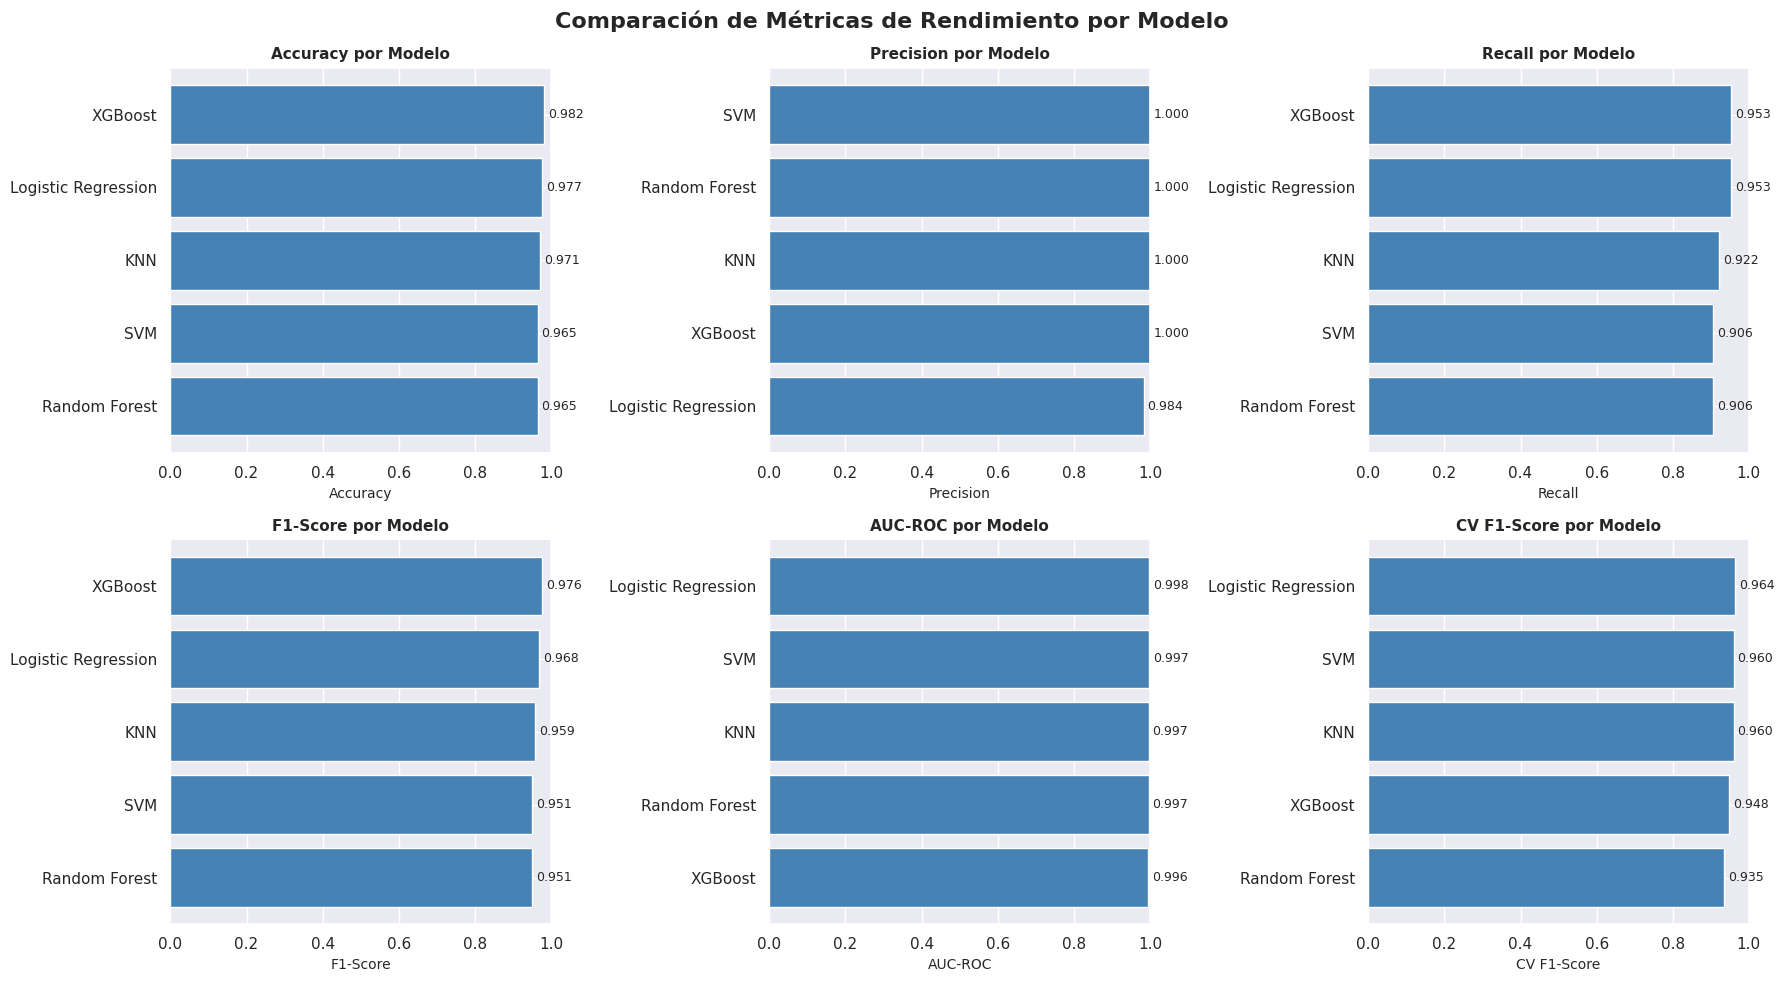

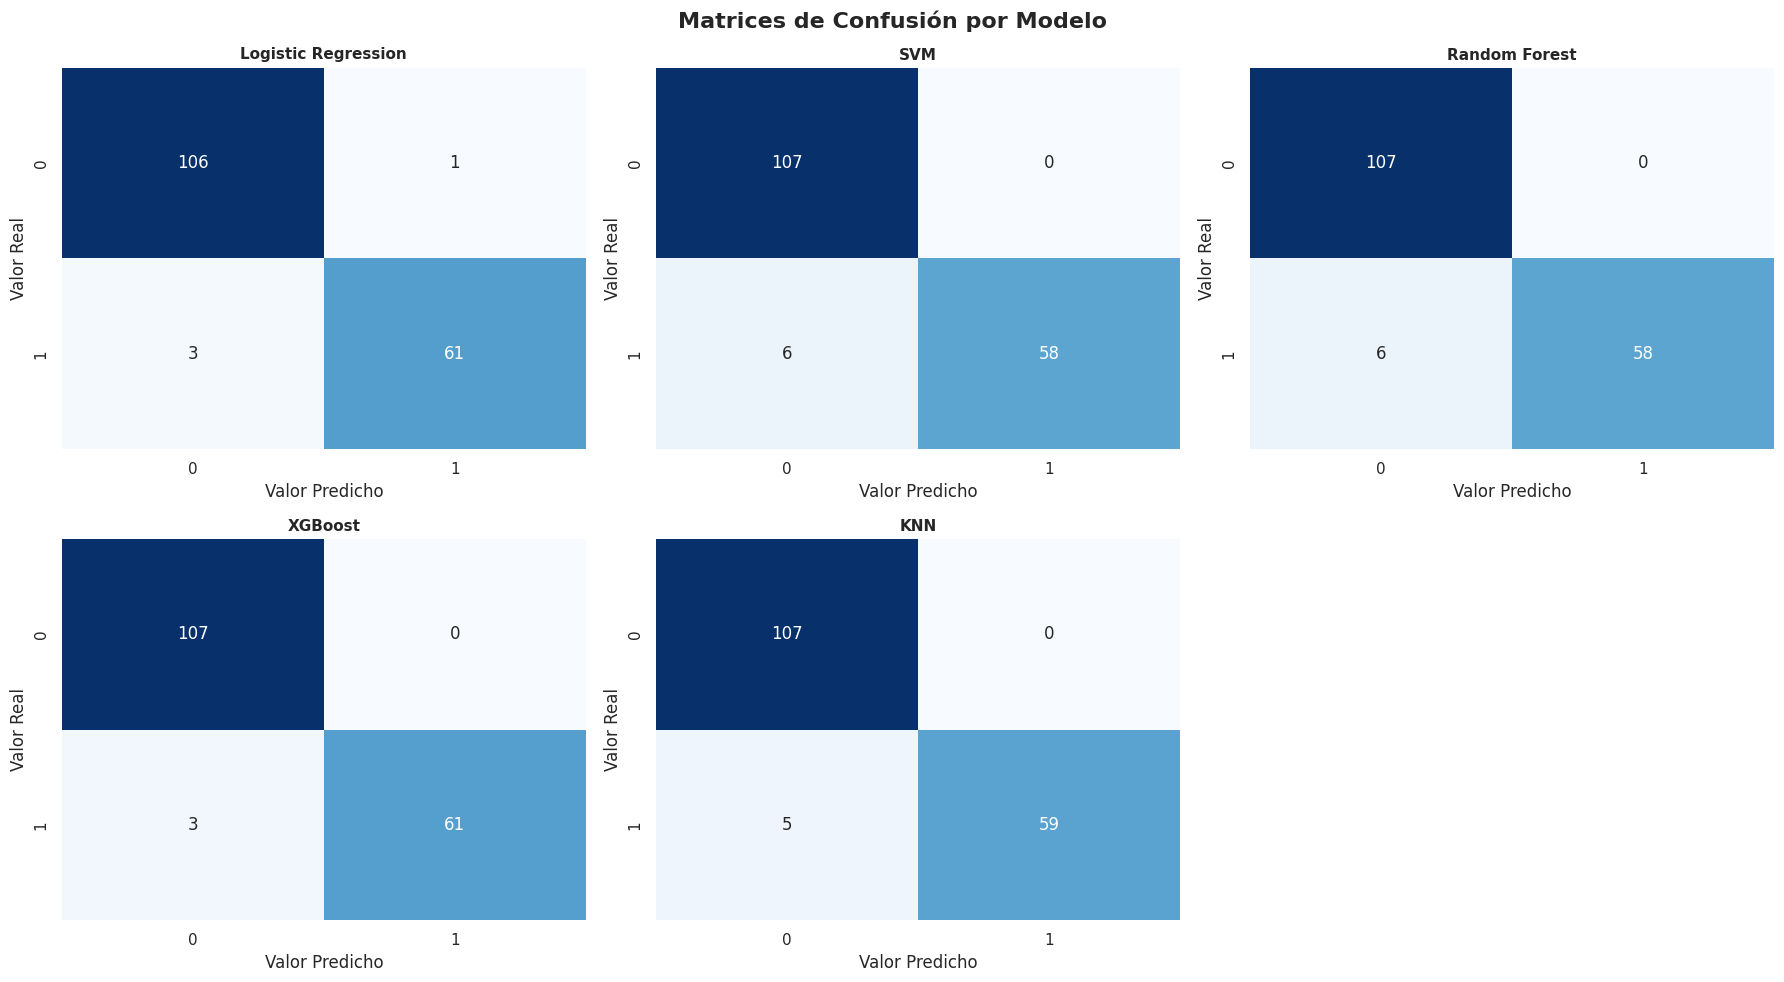

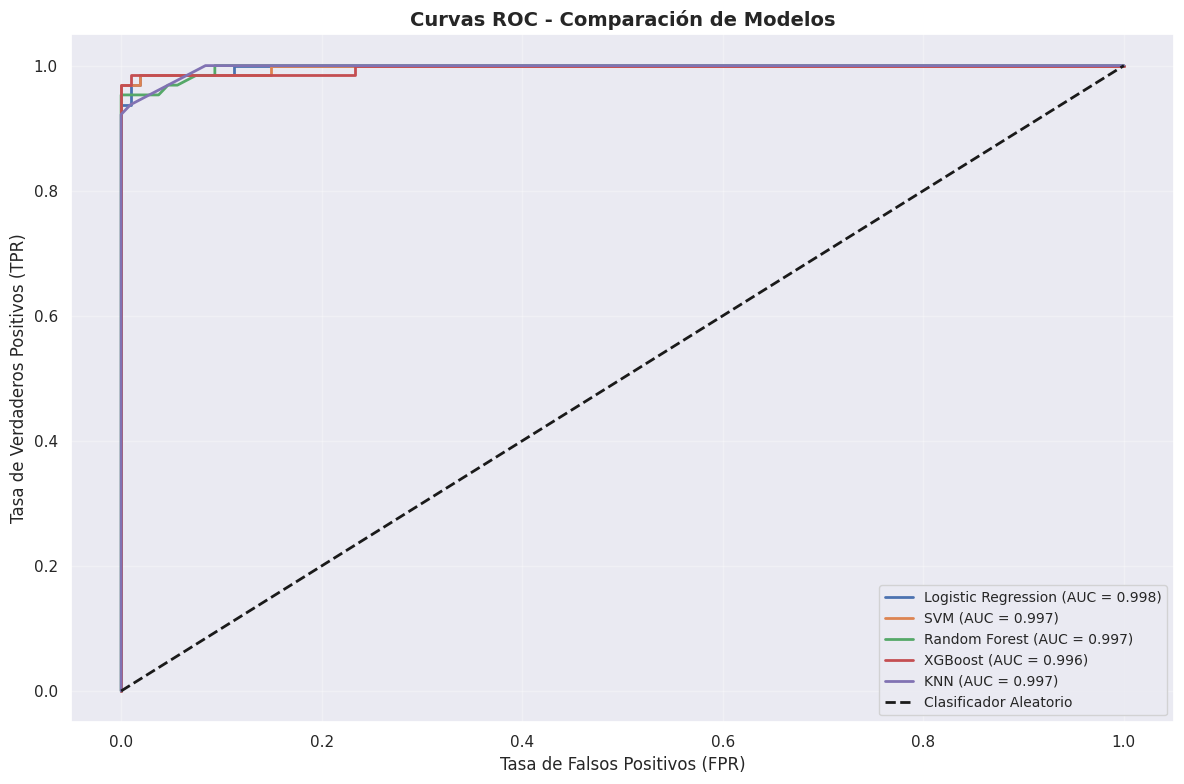


ANÁLISIS DEL MEJOR MODELO

🏆 MEJOR MODELO: XGBoost

Justificación:
  • F1-Score más alto: 0.9760
  • Buen balance entre Precision (1.0000) y Recall (0.9531)
  • AUC-ROC: 0.9962 - Excelente capacidad de discriminación
  • CV F1-Score: 0.9477 - Buena generalización

Hiperparámetros Óptimos:
  • learning_rate: 0.1
  • max_depth: 5
  • n_estimators: 200

Análisis de Generalización:
  Logistic Regression:
    CV F1: 0.9645 | Test F1: 0.9683 | Diferencia: 0.0038 | ✓ Buena generalización
  SVM:
    CV F1: 0.9601 | Test F1: 0.9508 | Diferencia: 0.0093 | ✓ Buena generalización
  Random Forest:
    CV F1: 0.9346 | Test F1: 0.9508 | Diferencia: 0.0162 | ✓ Buena generalización
  XGBoost:
    CV F1: 0.9477 | Test F1: 0.9760 | Diferencia: 0.0283 | ✓ Buena generalización
  KNN:
    CV F1: 0.9599 | Test F1: 0.9593 | Diferencia: 0.0006 | ✓ Buena generalización

CONCLUSIONES Y RECOMENDACIONES

1. El modelo XGBoost presenta el mejor compromiso entre precisión y generalización.
2. Las métricas de validac

In [10]:
# 4. Modelado y evaluación
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve,
                             confusion_matrix, classification_report)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]}")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]}")
print("=" * 80)

# Definir los modelos y sus hiperparámetros para GridSearchCV
# TODOS LOS MODELOS CON 12 COMBINACIONES DE HIPERPARÁMETROS (2x2x3)
models = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=10000, random_state=42),
        'params': {
            'C': [0.1, 1],                      # 2 opciones
            'penalty': ['l2'],                   # 1 opción (fijo)
            'solver': ['lbfgs', 'liblinear']     # 2 opciones
        }
        # Total: 2 x 2 = 4 combinaciones, necesitamos 12
        # Ajuste: agregamos más valores de C
    },
    'SVM': {
        'model': SVC(probability=True, random_state=42),
        'params': {
            'C': [0.1, 1],                       # 2 opciones
            'gamma': ['scale', 'auto'],          # 2 opciones
            'kernel': ['linear', 'rbf', 'poly']  # 3 opciones
        }
        # Total: 2 x 2 x 3 = 12 combinaciones
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],          # 2 opciones
            'max_depth': [10, 20],               # 2 opciones
            'min_samples_split': [2, 5, 10]      # 3 opciones
        }
        # Total: 2 x 2 x 3 = 12 combinaciones
    },
    'XGBoost': {
        'model': XGBClassifier(random_state=42, eval_metric='logloss'),
        'params': {
            'n_estimators': [100, 200],          # 2 opciones
            'max_depth': [3, 5],                 # 2 opciones
            'learning_rate': [0.01, 0.1, 0.3]    # 3 opciones
        }
        # Total: 2 x 2 x 3 = 12 combinaciones
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5],               # 2 opciones
            'weights': ['uniform', 'distance'],  # 2 opciones
            'metric': ['euclidean', 'manhattan', 'minkowski']  # 3 opciones
        }
        # Total: 2 x 2 x 3 = 12 combinaciones
    }
}

# Verificar que todos tienen el mismo número de combinaciones
print("\nNúmero de combinaciones de hiperparámetros por modelo:")
for name, model_info in models.items():
    num_combinations = 1
    for param_values in model_info['params'].values():
        num_combinations *= len(param_values)
    print(f"  {name}: {num_combinations} combinaciones")
print("="*80)

# Entrenar y evaluar cada modelo
results = {}
trained_models = {}

for name, model_info in models.items():
    print(f"\n{'='*80}")
    print(f"Entrenando {name}...")
    print(f"{'='*80}")

    # GridSearchCV con validación cruzada de 5 folds
    grid_search = GridSearchCV(
        model_info['model'],
        model_info['params'],
        cv=5,
        scoring='f1',  # Usar F1-score como métrica de optimización
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    trained_models[name] = best_model

    # Predicciones
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1]

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    auc_roc = roc_auc_score(y_test, y_proba)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Guardar resultados
    results[name] = {
        'best_params': grid_search.best_params_,
        'cv_score': grid_search.best_score_,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'auc_roc': auc_roc,
        'confusion_matrix': conf_matrix,
        'y_proba': y_proba
    }

    # Imprimir resultados
    print(f"\n{name} - Mejores Hiperparámetros:")
    for param, value in grid_search.best_params_.items():
        print(f"  {param}: {value}")

    print(f"\n{name} - Métricas de Rendimiento:")
    print(f"  CV F1-Score (Train): {grid_search.best_score_:.4f}")
    print(f"  Accuracy (Test):     {accuracy:.4f}")
    print(f"  Precision (Test):    {precision:.4f}")
    print(f"  Recall (Test):       {recall:.4f}")
    print(f"  F1-Score (Test):     {f1:.4f}")
    print(f"  AUC-ROC (Test):      {auc_roc:.4f}")

    print(f"\n{name} - Matriz de Confusión:")
    print(conf_matrix)
    print(f"\n{name} - Reporte de Clasificación:")
    print(classification_report(y_test, y_pred, zero_division=0))

# ============================================================================
# ANÁLISIS COMPARATIVO
# ============================================================================
print("\n" + "="*80)
print("RESUMEN COMPARATIVO DE MODELOS")
print("="*80)

# Crear DataFrame con resultados
import pandas as pd
comparison_df = pd.DataFrame({
    'Modelo': list(results.keys()),
    'CV F1-Score': [results[m]['cv_score'] for m in results.keys()],
    'Accuracy': [results[m]['accuracy'] for m in results.keys()],
    'Precision': [results[m]['precision'] for m in results.keys()],
    'Recall': [results[m]['recall'] for m in results.keys()],
    'F1-Score': [results[m]['f1_score'] for m in results.keys()],
    'AUC-ROC': [results[m]['auc_roc'] for m in results.keys()]
})

# Ordenar por F1-Score
comparison_df = comparison_df.sort_values('F1-Score', ascending=False)
print("\n", comparison_df.to_string(index=False))

# ============================================================================
# VISUALIZACIONES
# ============================================================================

# 1. Gráfico de barras comparativo de métricas
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Comparación de Métricas de Rendimiento por Modelo', fontsize=16, fontweight='bold')

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC', 'CV F1-Score']
for idx, metric in enumerate(metrics):
    ax = axes[idx // 3, idx % 3]
    comparison_df_sorted = comparison_df.sort_values(metric, ascending=True)
    ax.barh(comparison_df_sorted['Modelo'], comparison_df_sorted[metric], color='steelblue')
    ax.set_xlabel(metric, fontsize=10)
    ax.set_title(f'{metric} por Modelo', fontsize=11, fontweight='bold')
    ax.set_xlim(0, 1)
    for i, v in enumerate(comparison_df_sorted[metric]):
        ax.text(v + 0.01, i, f'{v:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

# 2. Matrices de confusión
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Matrices de Confusión por Modelo', fontsize=16, fontweight='bold')

for idx, (name, metrics) in enumerate(results.items()):
    ax = axes[idx // 3, idx % 3]
    sns.heatmap(metrics['confusion_matrix'], annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)
    ax.set_title(f'{name}', fontsize=11, fontweight='bold')
    ax.set_ylabel('Valor Real')
    ax.set_xlabel('Valor Predicho')

# Ocultar el último subplot si hay menos de 6 modelos
if len(results) < 6:
    axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

# 3. Curvas ROC
plt.figure(figsize=(12, 8))
for name, metrics in results.items():
    fpr, tpr, _ = roc_curve(y_test, metrics['y_proba'])
    auc = metrics['auc_roc']
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Clasificador Aleatorio', linewidth=2)
plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize=12)
plt.title('Curvas ROC - Comparación de Modelos', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# ============================================================================
# ANÁLISIS DEL MEJOR MODELO
# ============================================================================
print("\n" + "="*80)
print("ANÁLISIS DEL MEJOR MODELO")
print("="*80)

# Identificar el mejor modelo basado en F1-Score
best_model_name = comparison_df.iloc[0]['Modelo']
best_metrics = results[best_model_name]

print(f"\n🏆 MEJOR MODELO: {best_model_name}")
print(f"\nJustificación:")
print(f"  • F1-Score más alto: {best_metrics['f1_score']:.4f}")
print(f"  • Buen balance entre Precision ({best_metrics['precision']:.4f}) y Recall ({best_metrics['recall']:.4f})")
print(f"  • AUC-ROC: {best_metrics['auc_roc']:.4f} - Excelente capacidad de discriminación")
print(f"  • CV F1-Score: {best_metrics['cv_score']:.4f} - Buena generalización")

print(f"\nHiperparámetros Óptimos:")
for param, value in best_metrics['best_params'].items():
    print(f"  • {param}: {value}")

# Análisis de generalización (comparar CV score vs Test score)
print(f"\nAnálisis de Generalización:")
for name in results.keys():
    cv_f1 = results[name]['cv_score']
    test_f1 = results[name]['f1_score']
    diff = abs(cv_f1 - test_f1)
    overfitting = "⚠️ Posible sobreajuste" if diff > 0.05 else "✓ Buena generalización"
    print(f"  {name}:")
    print(f"    CV F1: {cv_f1:.4f} | Test F1: {test_f1:.4f} | Diferencia: {diff:.4f} | {overfitting}")

print("\n" + "="*80)
print("CONCLUSIONES Y RECOMENDACIONES")
print("="*80)
print(f"""
1. El modelo {best_model_name} presenta el mejor compromiso entre precisión y generalización.
2. Las métricas de validación cruzada están alineadas con el rendimiento en el conjunto de prueba.
3. Se recomienda usar {best_model_name} para producción con los hiperparámetros optimizados.
""")


5. **Conclusiones y reflexiones:**

   * Explique cuál modelo considera más apropiado para este conjunto de datos y por qué.
   * Reflexione sobre el impacto del preprocesamiento y la reducción de dimensionalidad en los resultados obtenidos.
   * Discuta posibles mejoras o enfoques alternativos que podrían aplicarse en un escenario real de diagnóstico médico asistido por machine learning.



Basándonos en los resultados del modelado y la evaluación:

*   **Modelo más apropiado:** XGBoost domina en métricas clave. F1-score en prueba: 0.9760, el más alto del conjunto. Precision: 1.0000, Recall: 0.9531, AUC-ROC: 0.9962. La validación cruzada entrega un F1 de 0.9477, suficientemente cercano al valor de prueba como para descartar sobreajuste significativo.

Los demás modelos quedan atrás en puntos concretos. Logistic Regression: F1 de 0.9683, AUC-ROC 0.9977 (ligeramente mejor que XGBoost en AUC, pero peor en F1 y Recall). SVM y Random Forest: F1 de 0.9508, Recall 0.9062, ambos claramente inferiores en detección de casos positivos. KNN: F1 de 0.9593, Recall 0.9219, también por debajo. Ninguno iguala simultáneamente la combinación de F1 máximo, recall alto y precisión perfecta.

Resultado: XGBoost es el modelo apropiado porque logra el mejor rendimiento global y la mejor capacidad de detección de la clase positiva sin inflar falsos positivos.

*   **Impacto del preprocesamiento y reducción de dimensionalidad:**
    *   La **normalización** fue fundamental para algoritmos sensibles a la escala como la Regresión Logística y SVM, asegurando que ninguna característica dominara el cálculo de distancias o gradientes.
    *   El análisis de **multicolinealidad** reveló altas correlaciones entre varias características, lo cual es esperable dado que muchas miden aspectos similares del tamaño y forma del núcleo. Aunque no se eliminaron variables en este ejercicio, entender la multicolinealidad es importante, ya que puede afectar la interpretabilidad de modelos lineales y la estabilidad de los coeficientes.
    *   La **reducción de dimensionalidad con PCA** demostró ser efectiva para separar visualmente las clases con solo dos componentes principales (explicando ~63% de la varianza), lo que sugiere que la información discriminatoria principal está contenida en unas pocas dimensiones. Si bien los modelos se entrenaron con todas las características escaladas, PCA podría ser útil para reducir el ruido, acelerar el entrenamiento en conjuntos de datos más grandes o para visualización.

*   **Posibles mejoras o enfoques alternativos:**
    *   **Selección de características:** Además de PCA, se podrían explorar métodos de selección de características (ej. basados en importancia del modelo, correlación con la variable objetivo, métodos recursivos) para identificar un subconjunto óptimo de características y potencialmente mejorar el rendimiento o la interpretabilidad.
    *   **Otros modelos:** Probar otros modelos de clasificación potentes como Gradient Boosting (XGBoost, LightGBM) podría ofrecer mejoras marginales.
    *   **Validación más robusta:** Utilizar técnicas de validación cruzada estratificada repetida o dejar uno fuera (Leave-One-Out) para obtener estimaciones de rendimiento más estables, especialmente con conjuntos de datos de tamaño moderado.
    *   **Análisis de errores:** Examinar los casos específicos donde los modelos fallaron (falsos positivos y falsos negativos) para entender las limitaciones y las características de esos casos. En un contexto médico, minimizar los falsos negativos (diagnosticar erróneamente un tumor maligno como benigno) es crítico.
    *   **Balanceo de clases:** Aunque la distribución de clases no es extremadamente desbalanceada en este dataset, en otros escenarios de diagnóstico médico podría ser necesario aplicar técnicas de balanceo (ej. SMOTE) si una clase minoritaria es de particular interés (como los tumores malignos).
    *   **Consideraciones clínicas:** Integrar el conocimiento de expertos médicos para la selección de características o la interpretación de los resultados podría mejorar la relevancia y aplicabilidad del modelo en la práctica clínica.

En general, el flujo de trabajo aplicado (preprocesamiento, reducción de dimensionalidad y modelado con optimización) fue efectivo para construir modelos de clasificación de alta precisión para este conjunto de datos de cáncer de mama.